# Exercise Twelve: Texts, Three Ways

For this week, you will sample the three methods we've explored (topic modeling, sentiment analysis, and Markov chain generation) using the same set of root texts. 

- Collect and import ten documents (novels work best, but anything goes!)
- Using the topic modeling code as a starter, build a topic model of the documents (Pick a topic run word cloud)
- Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare (See what is interesting)
- Using the Markov chain code as a starter, generate a sentence using one of the documents
- Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

As a bonus, try to extend this analysis to note other features of these documents using any of our previous exercises as a starting point.

Importing 10 works by Arthur Conan Doyle, as used in last week's exercise.

In [1]:
import nltk 
nltk.download('averaged_perceptron_tagger')

import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stoddard\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
textdir = 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\'
os.chdir(textdir)

# Topic Modeling

In [3]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames))
print(filenames[:10]) 

10
['C:\\Users\\Stoddard\\DesignDevExercises\\text\\adventure.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\boer.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\fear.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\hound.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\last.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\memoirs.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\return.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\scarlet.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\sign.txt', 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\white.txt']


In [4]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

In [5]:
print(f'Shape of document-term matrix: {dtm.shape}. '# in this case the shape is 7 b/c 7 docs
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 25327). Number of tokens 400349


In [6]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

In [7]:
document_topic_distributions = model.fit_transform(dtm)

In [8]:
# Grabbing a set of vocab
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [9]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00        000        04    0index        10       100  \
Topic 0   8.576775  10.733047  0.940572  0.929454  8.437956  3.959951   
Topic 1   0.185883   0.204047  0.247339  0.166100  0.197605  0.195640   
Topic 2   0.189086   0.237564  0.207426  0.212009  0.228660  0.217254   
Topic 3   0.207548   0.218307  0.220007  0.193932  0.246547  0.245101   
Topic 4   0.238569   0.282050  0.247576  0.208906  0.231058  0.187769   
...            ...        ...       ...       ...       ...       ...   
Topic 95  0.181787   0.243313  0.231539  0.203405  0.226715  0.246606   
Topic 96  0.194982   0.219258  0.210738  0.194090  0.216290  0.195555   
Topic 97  0.227863   0.255689  0.205471  0.185175  0.240855  0.210776   
Topic 98  0.166174   0.170569  0.185170  0.171905  0.216975  0.228452   
Topic 99  0.200963   0.236667  0.184255  0.187261  0.259433  0.224074   

              1000       104       105       108  ...        zu  \
Topic 0   7.830797  0.922023  0.228465  0.930915  ...  0

In [10]:
topic_word_distributions.loc['Topic 7'].sort_values(ascending=False).head(18)

man       1.988095
said      1.963111
holmes    1.520435
come      1.059256
men       1.013709
came      0.992817
little    0.984254
long      0.907347
mr        0.876253
room      0.875963
hand      0.821706
time      0.810467
house     0.806232
left      0.764025
face      0.756053
case      0.723617
saw       0.711901
way       0.709161
Name: Topic 7, dtype: float64

In [11]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

        Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0  9.999770e-01  2.318518e-07  2.318518e-07  2.318518e-07  2.318518e-07   
1  1.008685e-07  1.008685e-07  1.008685e-07  1.008685e-07  1.008685e-07   
2  9.999589e-01  4.149205e-07  4.149205e-07  4.149205e-07  4.149205e-07   
3  9.999593e-01  4.108801e-07  4.108801e-07  4.108801e-07  4.108801e-07   
4  9.999610e-01  3.935768e-07  3.935768e-07  3.935768e-07  3.935768e-07   
5  9.999717e-01  2.857714e-07  2.857714e-07  2.857714e-07  2.857714e-07   
6  9.999780e-01  2.226924e-07  2.226924e-07  2.226924e-07  2.226924e-07   
7  9.999487e-01  5.184302e-07  5.184302e-07  5.184302e-07  5.184302e-07   
8  9.999471e-01  5.339884e-07  5.339884e-07  5.339884e-07  5.339884e-07   
9  1.507659e-07  1.507659e-07  1.507659e-07  1.507659e-07  1.507659e-07   

        Topic 5       Topic 6       Topic 7       Topic 8       Topic 9  ...  \
0  2.318518e-07  2.318518e-07  2.318518e-07  2.318518e-07  2.318518e-07  ...   
1  1.008685e-0

In [12]:
words = topic_word_distributions.loc['Topic 7'].sort_values(ascending=False).head(18)
words


man       1.988095
said      1.963111
holmes    1.520435
come      1.059256
men       1.013709
came      0.992817
little    0.984254
long      0.907347
mr        0.876253
room      0.875963
hand      0.821706
time      0.810467
house     0.806232
left      0.764025
face      0.756053
case      0.723617
saw       0.711901
way       0.709161
Name: Topic 7, dtype: float64

00        0.206893
000       0.219208
04        0.288450
0index    0.169694
10        0.199521
100       0.219738
1000      0.229044
104       0.248262
105       0.186511
108       0.188284
109       0.184706
10_s      0.254608
10th      0.212179
11        0.218225
110       0.206241
1100      0.204558
112       0.186980
114       0.222849
117       0.269852
117th     0.202239
Name: Topic 7, dtype: float64


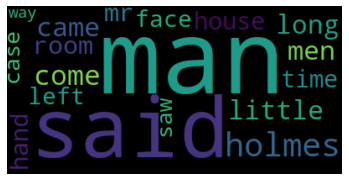

In [13]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 7'].head(20))


wordcloud = WordCloud().generate_from_frequencies(words)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Thank you!  The change from filenames to filename appears to have solved the issue.  


# Sentiment Analysis

In [15]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Stoddard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stoddard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# the variable 'message_text' now contains the text we will analyze.
message_text = '''Mr. Sherlock Holmes, who was usually very late in the mornings,
save upon those not infrequent occasions when he was up all
night, was seated at the breakfast table. I stood upon the
hearth-rug and picked up the stick which our visitor had left
behind him the night before. It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a "Penang lawyer."
Just under the head was a broad silver band nearly an inch
across. "To James Mortimer, M.R.C.S., from his friends of the
C.C.H.," was engraved upon it, with the date "1884." It was just
such a stick as the old-fashioned family practitioner used to
carry--dignified, solid, and reassuring.'''

In [17]:
print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

Mr. Sherlock Holmes, who was usually very late in the mornings,
save upon those not infrequent occasions when he was up all
night, was seated at the breakfast table. I stood upon the
hearth-rug and picked up the stick which our visitor had left
behind him the night before. It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a "Penang lawyer."
Just under the head was a broad silver band nearly an inch
across. "To James Mortimer, M.R.C.S., from his friends of the
C.C.H.," was engraved upon it, with the date "1884." It was just
such a stick as the old-fashioned family practitioner used to
carry--dignified, solid, and reassuring.
compound: 0.886, neg: 0.0, neu: 0.895, pos: 0.105, 

In [18]:
# below is the sentiment analysis code rewritten for sentence-level analysis
# note the new module -- word_tokenize!
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

# We will also initialize our 'english.pickle' function and give it a short name

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

message_text = '''Mr. Sherlock Holmes, who was usually very late in the mornings,
save upon those not infrequent occasions when he was up all
night, was seated at the breakfast table. I stood upon the
hearth-rug and picked up the stick which our visitor had left
behind him the night before. It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a "Penang lawyer."
Just under the head was a broad silver band nearly an inch
across. "To James Mortimer, M.R.C.S., from his friends of the
C.C.H.," was engraved upon it, with the date "1884." It was just
such a stick as the old-fashioned family practitioner used to
carry--dignified, solid, and reassuring.'''

# The tokenize method breaks up the paragraph into a list of strings. In this example, note that the tokenizer is confused by the absence of spaces after periods and actually fails to break up sentences in two instances. How might you fix that?

sentences = tokenizer.tokenize(message_text)

# We add the additional step of iterating through the list of sentences and calculating and printing polarity scores for each one.

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()


Mr. Sherlock Holmes, who was usually very late in the mornings,
save upon those not infrequent occasions when he was up all
night, was seated at the breakfast table.
compound: 0.4939, neg: 0.0, neu: 0.897, pos: 0.103, 
I stood upon the
hearth-rug and picked up the stick which our visitor had left
behind him the night before.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a "Penang lawyer."
compound: 0.2023, neg: 0.0, neu: 0.899, pos: 0.101, 
Just under the head was a broad silver band nearly an inch
across.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"To James Mortimer, M.R.C.S., from his friends of the
C.C.H.," was engraved upon it, with the date "1884."
compound: 0.4767, neg: 0.0, neu: 0.846, pos: 0.154, 
It was just
such a stick as the old-fashioned family practitioner used to
carry--dignified, solid, and reassuring.
compound: 0.5106, neg: 0.0, neu: 0.765, pos: 0.235, 


# Markov chain code sentence

In [19]:
import markovify
import random

In [20]:
with open("hound.txt",encoding='utf-8') as f:
    text = f.read()

In [21]:
text_model = markovify.Text(text)

In [23]:
print( text_model.make_sentence() )

Sir Henry was much interested and asked him casually to what I had often been piqued by his good fortune, and many fees to meet and keep up with these requirements.


# Markov chain code to generate a longer text fragment 

In [25]:
import os
path = 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}\{entry.name}',encoding='utf-8')
        text += f.read()

adventure.txt
boer.txt
fear.txt
hound.txt
last.txt
memoirs.txt
return.txt
scarlet.txt
sign.txt
white.txt


In [26]:
novel = ''
while (len( novel.split(" ")) < 500):# Novel lenght
  for i in range(random.randrange(3,9)): # Paragraph structure 3 to 9 sent
    novel += text_model.make_sentence() + " "
  novel += "\n\n"
    # print(text_model.make_sentence()

print(novel)
# Write a file as .txt to export the production 

The hound was dead. John Clayton departed chuckling, and Holmes breathed a word about it yet to mortal man. At first he thought that she had married without his consent, and perhaps for one was in the east of Yorkshire. Both road and every turn of the most direct way is always to do so. He stood now gazing with great reverence at the door and we were dealing with a sudden passion of earnestness. We all three shook hands, and I sat, upon a friend in America. If I could see no better course than to anyone else. 

By his cries he must have been so entirely cleared up in despair, when in an uproar, some calling for their missing man, but it appeared to be circumspect in the dark veil. There's another one waiting for us to the edge of the night's adventures had shattered his nerves, and before I have tried to picture all that had passed, and he recognized how foolish and how to help the police in any way. Mrs. Lyons knew neither of these a staple and chain with a strong suspicion against St